# EOmaps Workshop GeoPython 2024
<font size=3>Interactive geo-data analysis with EOmaps and the scientific python infrastructure.</font>

# EOmaps Basics

A (very) quick walk through the capabilities of [**EOmaps**][eomaps]

For a more complete overview, have a look at the [**Documentation**][eomaps]!

---

[eomaps]: https://eomaps.readthedocs.io
[docs]: https://eomaps.readthedocs.io

## Basic concepts

To start creating a map, we initialize a new [**`Maps`**][Maps] object.  

The first [**`Maps`**][Maps] object that is created will initialize a [**`matplotlib.Figure`**][figure] and a [**`cartopy.GeoAxes`**][geoaxes] for a map.  
You can then use the returned [**`Maps`**][Maps] instance to add features/callbacks etc. to the associated map.


The basic call-signature is:
```python
m = Maps(crs="the projection of the map", **figure_kwargs)

m.f   # the matplotlib.Figure associated with the Maps object
m.ax  # the cartopy.GeoAxes   associated with the Maps object
```

The **crs** can be an integer (identified as epsg-code, e.g. 3857) or a [**`cartopy.Projection`**][cartopy_projection].  
(Available projections are also directly accessible via `Maps.CRS.< projection name >`)


<div class="alert alert-block alert-info"> 

Once your map is ready, you can show it by calling [`m.show()`][Maps.show]:.  
In **Jupyter Notebooks** you can also print a **static snapshot of the current state of the map** to the active cell with [`m.snapshot()`][Maps.snapshot]

To save the map as *png, jpeg, svg, pdf*  etc. use [`m.savefig()`][Maps.savefig]

</div>

[Maps]: https://eomaps.readthedocs.io/en/dev/generated/eomaps.eomaps.Maps.html
[figure]: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
[geoaxes]: https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html
[cartopy_projection]: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html
[Maps.show]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.show.html
[Maps.snapshot]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.snapshot.html
[Maps.savefig]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.savefig.html

## Syntax

EOmaps tries to make commands easily findable:

- To **add** something to a map, use [`m.add_...`][add features]
- To **set** properties of a map, use [`m.set_...`][data vis]
- To create **new** maps or layers, use [`m.new_...`][new]
- Everything related to **callbacks** is accessible via [`m.cb...`][callbacks]

[add features]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.html#map-features
[callbacks]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.html#callbacks
[new]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.html#layers-and-maps
[data vis]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.html#data-visualization

## Lets create a first map

In [56]:
# set the backend to use (the default is 'inline')
%matplotlib qt

In [19]:
from eomaps import Maps
Maps.config(always_on_top=True, log_level="info")      # set log-level and keep Qt figures "always on top"

In [20]:
m = Maps(figsize=(6, 3), facecolor="none")             # Initialize a new map

In [21]:
# add some features to the map
m.add_feature.preset.coastline()
m.add_feature.physical.ocean(scale=50, fc="lightblue", ec="darkblue", hatch="xxx", alpha=0.25)

In [25]:
m.set_extent((-13.69, 37.54, 34.58, 59.05), crs=4326)
m.set_frame(rounded=0.25, ec="0.5")                    # Adjust the map boundary

In [26]:
# add a compass and a logo
m.add_compass(pos=(-4.93, 39.5), pos_transform="lonlat", scale=7,)
m.add_scalebar()
m.add_logo()

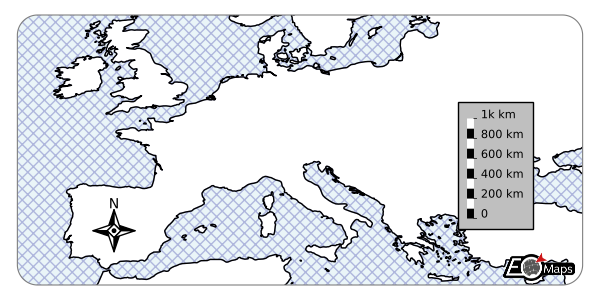

In [16]:
# print a static snapshot of the "current state of the figure" to the notebook
m.snapshot()

---

## Layer Management
Figures created with EOmaps are **multi-layered**!  

<a href="https://raw.githubusercontent.com/raphaelquast/EOmaps/master/docs/_static/intro.png"><img src="https://raw.githubusercontent.com/raphaelquast/EOmaps/master/docs/_static/intro.png" width=30%></a>

In [45]:
m = Maps(crs=3857, figsize=(4, 4))

In [46]:
m.layer

'base'

Create a few new layers

In [47]:
m_ocean = m.new_layer("ocean")
m_markers = m.new_layer("markers")
m_overlay = m.new_layer("overlay")

Add features to the `"ocean"` layer

In [48]:
m_ocean.add_feature.preset.ocean()

Add features to the `"markers"` layer

In [49]:
_ = m_markers.add_marker(
    xy=([-10, 20, 70], [-10, 20, 70]), xy_crs=4326, 
    shape="ellipses", radius=10, radius_crs=4326, 
    fc=["r", "g", "b"], 
)

Add features to the `"overlay"` layer

In [50]:
m_overlay.add_feature.preset.coastline(lw=0.25)

_ = m_overlay.add_annotation(
    xy=(7.642, 47.535), xy_crs=4326, xytext=(-60, 50),
    text="GeoPython 2024\n(Basel)", weight="bold", ha="center",
)

Add features to the `"grid"` layer

In [51]:
# Note that this time we use the "layer" kwarg instead of creating an explicit Maps object
g = m.add_gridlines(25, lw=0.5, c=".5", layer="grid")
g2 = m.add_gridlines([7.642, 47.535], lw=2, ls="--", layer="grid")
_ = g2.add_labels(where="tr", weight="bold")

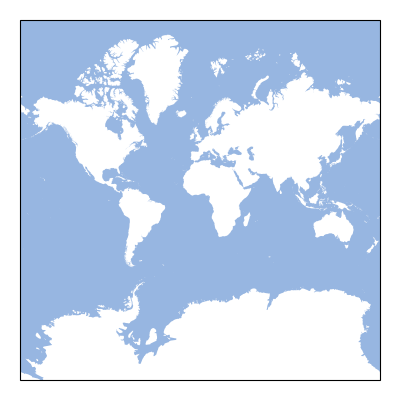

In [52]:
m.show_layer("ocean")
m.snapshot()

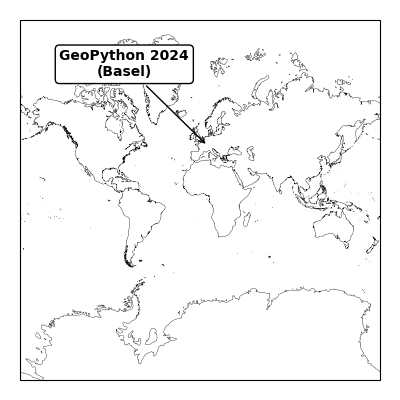

In [53]:
m.show_layer("overlay")
m.snapshot()

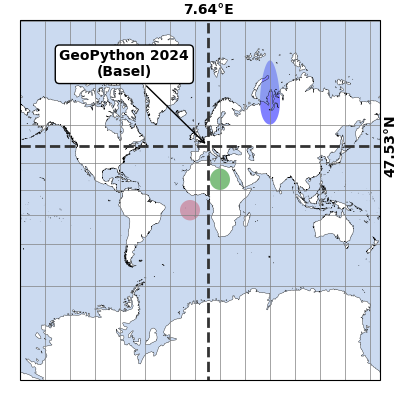

20:31:24.632 INFO: EOmaps: ... adding wms-layer GOOGLE_satellite


In [54]:
m.show_layer(m.layer, (m_markers.layer, .5), (m_ocean.layer, .5),  m_overlay.layer, "grid")
m.snapshot()

## Companion Widget

<div class="alert alert-block alert-info"> 

To activate, press **W** while mouse is on top of an *active figure* that contains an EOmaps map.

</div>


Some nice features:

- Interactively overlay / compare / combine layers
- Use `control + c` to copy the current state of the figure to the clipboard
  - Set export properties (export format, resolution etc.) in the widget!
- Quickly draw simple (geo-coded) shapes on a map
- Browse through features and webmaps and get additional info.
- ...


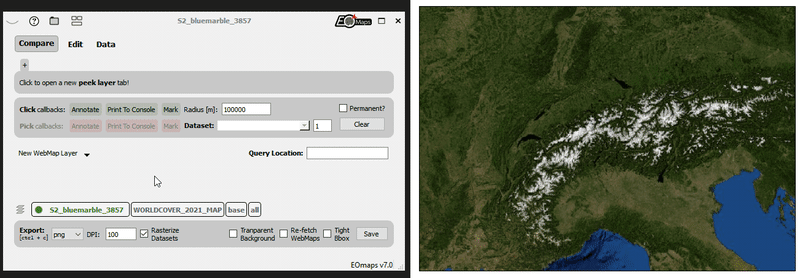


# [$\Rightarrow$ Data Visualization](<02 Data Visualization.ipynb>)